<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/10_PCA_dimensionality_reduction_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Import Dataset

In [3]:
from sklearn import datasets
wine = datasets.load_wine()

In [4]:
wine.data.shape

(178, 13)

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

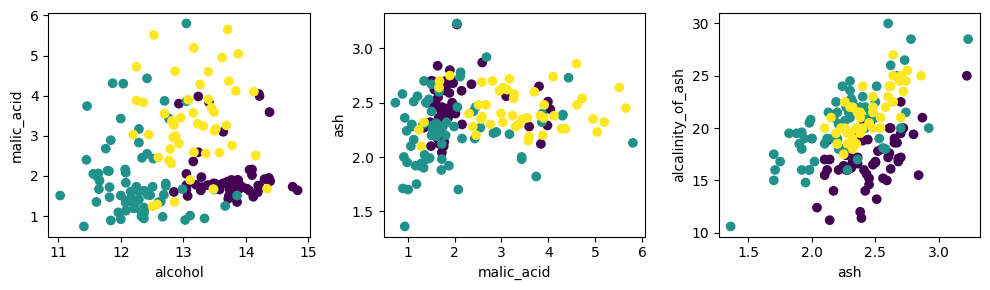

In [6]:
# We can not have a single visual representation that uses all 13 linearly independent standard axes.
# 3 sampe subplots  each pairwise subplot uses initial two columns from the pair of 1,2, and 2,3 and 3,4th columns of the 13 features

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target)
axes[0].set_xlabel(wine.feature_names[0])
axes[0].set_ylabel(wine.feature_names[1])

axes[1].scatter(wine.data[:, 1], wine.data[:, 2], c=wine.target)
axes[1].set_xlabel(wine.feature_names[1])
axes[1].set_ylabel(wine.feature_names[2])

axes[2].scatter(wine.data[:, 2], wine.data[:, 3], c=wine.target)
axes[2].set_xlabel(wine.feature_names[2])
axes[2].set_ylabel(wine.feature_names[3])
plt.tight_layout()

### Principal Component Analysis

In [7]:
# feature(X) and target(y)
X = wine.data
y = wine.target

In [8]:
# training, test data split
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=1)

In [9]:
# standardize data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

In [10]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # n_components specifies the number of principal components to keep after dimensionality reduction
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [11]:
# Check the principal components
print(X_tn_std.shape)
print(X_tn_pca.shape)

(133, 13)
(133, 3)


In [12]:
X_tn_std[0,:]

array([ 9.39769813e-02, -5.57878678e-01, -9.57528635e-01, -8.12986801e-01,
        6.02003840e-01,  1.18037140e+00,  1.02174187e+00, -7.43746316e-01,
        8.01107247e-01,  1.57444755e-04, -3.32934426e-01,  1.08163870e+00,
        4.71259449e-01])

In [13]:
X_tn_pca[0,:]

array([-2.23184845, -0.14860258, -0.680943  ])

In [14]:
# Check covariance matrix
print(pca.get_covariance())

[[ 1.03195275  0.03587918  0.18135301 -0.27818094  0.37253767  0.22808523
   0.17424858 -0.13369171  0.143066    0.50018565 -0.1457387  -0.0054789
   0.55267488]
 [ 0.03587918  0.79449457  0.20454083  0.32223678  0.03040493 -0.38751672
  -0.44304373  0.3440772  -0.29347713  0.2934237  -0.42523648 -0.45041897
  -0.15982532]
 [ 0.18135301  0.20454083  1.04839638  0.38656022  0.32165147  0.12412096
   0.07334912  0.13202547  0.11383269  0.23985797 -0.13447577 -0.01350976
   0.15870984]
 [-0.27818094  0.32223678  0.38656022  1.07998089 -0.03762772 -0.31791016
  -0.34647791  0.38880509 -0.20721731 -0.01888247 -0.24352266 -0.28017118
  -0.38480096]
 [ 0.37253767  0.03040493  0.32165147 -0.03762772  0.76733815  0.25977489
   0.22219723 -0.08569747  0.19081658  0.29429303 -0.03769041  0.09378726
   0.38713575]
 [ 0.22808523 -0.38751672  0.12412096 -0.31791016  0.25977489  1.154626
   0.74987336 -0.46553729  0.5448114  -0.14277781  0.50397175  0.65583227
   0.49218999]
 [ 0.17424858 -0.44304373

In [15]:
# Check Eigen Value
print(pca.singular_values_)

[24.81797394 18.31760391 14.01931669]


In [16]:
# Check Eigen Vector
print(pca.components_)

[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]
 [-0.19750406  0.12245735  0.62427543  0.61300129  0.15679439  0.14682744
   0.13724534  0.15091277  0.16002374 -0.14590484  0.07999435  0.15241541
  -0.12738466]]


In [17]:
# Varience Explained
print(pca.explained_variance_)

[4.66615023 2.54192889 1.48894879]


In [18]:
pd.DataFrame(pca.explained_variance_ratio_, wine.feature_names[:3], columns=['ratio'])

,ratio
alcohol,0.356236
malic_acid,0.194063
ash,0.113673


In [19]:
# Check the data in reduced dimensions
import pandas as pd
pca_columns = ['pca_comp1', 'pca_comp2', 'pca_comp3']
X_tn_pca_df = pd.DataFrame(X_tn_pca,
                           columns=pca_columns)
X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head(5)

,pca_comp1,pca_comp2,pca_comp3,target
0,-2.231848,-0.148603,-0.680943,0
1,-1.364444,0.422617,-1.136512,1
2,-1.918072,-2.014682,1.171022,0
3,-3.539272,-2.878394,-0.550656,0
4,-3.182320,-2.020041,-0.315936,0


In [32]:
# Data on new vector space composed of the 3 principal components
import matplotlib.cm as cm
import plotly.express as px

fig = px.scatter_3d(X_tn_pca_df, x='pca_comp1', y='pca_comp2', z='pca_comp3', color='target')
fig.show()


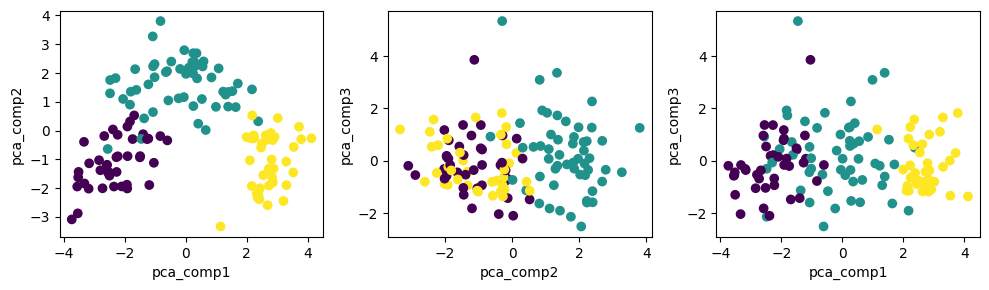

In [23]:
# multiple two dimensional views

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].scatter(X_tn_pca[:, 0], X_tn_pca[:, 1], c=y_tn)
axes[0].set_xlabel('pca_comp1')
axes[0].set_ylabel('pca_comp2')

axes[1].scatter(X_tn_pca[:, 1], X_tn_pca[:, 2], c=y_tn)
axes[1].set_xlabel('pca_comp2')
axes[1].set_ylabel('pca_comp3')

axes[2].scatter(X_tn_pca[:, 0], X_tn_pca[:, 2], c=y_tn)
axes[2].set_xlabel('pca_comp1')
axes[2].set_ylabel('pca_comp3')
plt.tight_layout()


### Comparison of accuracy scores before after PCA (using random forest classifier)

In [24]:
# before PCA (using all dimensions)
# training
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,random_state=0)
rf.fit(X_tn_std, y_tn)

# prediction
pred_rf = rf.predict(X_te_std)

In [ ]:
# accuracy before applying PCA
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

In [ ]:
X_tn_pca

In [ ]:
# PCA data (using only three dimensions of principal components)
# training
from sklearn.ensemble import RandomForestClassifier
clf_rf_pca = RandomForestClassifier(max_depth=2,random_state=0)
clf_rf_pca.fit(X_tn_pca, y_tn)

# prediction
pred_rf_pca = clf_rf_pca.predict(X_te_pca)

In [ ]:
# accuracy after applying PCA
from sklearn.metrics import accuracy_score
accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)

## Dimensions

When discussing the shape of a dataset, **"dimension"** typically refers to the number of axes or indices required to specify an element in the array (e.g., rows and columns in a 2D dataset).


When talking about machine learning algorithms or feature engineering, **"dimension"** usually refers to the number of features or attributes that describe each data point.